In [43]:
import pandas as pd
import numpy as np

In [44]:
# Load the datasets
files = {
    "Atlanta": "/content/c_atlanta.csv",
    "Baltimore": "/content/c_baltimore.csv",
    "Boston": "/content/c_boston.csv",
    "Cleveland": "/content/c_cleveland.csv",
    "Detroit": "/content/c_detroit.csv",
    "KansasCity": "/content/c_kansascity.csv",
    "Louisville": "/content/c_louisville.csv",
    "Memphis": "/content/c_memphis.csv",
    "Sacramento": "/content/c_sacramento.csv",
    "Tucson": "/content/c_tucson.csv"
}

In [45]:
# Read and store datasets in a dictionary
datasets = {city: pd.read_csv(path) for city, path in files.items()}

# Check the structure of the datasets
dataset_overview = {city: df.head() for city, df in datasets.items()}
dataset_shapes = {city: df.shape for city, df in datasets.items()}

dataset_shapes

{'Atlanta': (38279, 5),
 'Baltimore': (117477, 6),
 'Boston': (6583, 7),
 'Cleveland': (132944, 6),
 'Detroit': (251616, 7),
 'KansasCity': (116422, 7),
 'Louisville': (29363, 24),
 'Memphis': (17057, 17),
 'Sacramento': (18052, 7),
 'Tucson': (38260, 7)}

In [46]:
# Check for the required columns in each dataset
required_columns = ['season', 'time_of_day', 'day_of_week', 'crime_type']

columns_check = {city: all(col in df.columns for col in required_columns) for city, df in datasets.items()}
missing_columns = {city: [col for col in required_columns if col not in df.columns] for city, df in datasets.items()}

columns_check, missing_columns

({'Atlanta': True,
  'Baltimore': True,
  'Boston': True,
  'Cleveland': True,
  'Detroit': True,
  'KansasCity': True,
  'Louisville': True,
  'Memphis': True,
  'Sacramento': True,
  'Tucson': True},
 {'Atlanta': [],
  'Baltimore': [],
  'Boston': [],
  'Cleveland': [],
  'Detroit': [],
  'KansasCity': [],
  'Louisville': [],
  'Memphis': [],
  'Sacramento': [],
  'Tucson': []})

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np

In [49]:
# Normalize the case of 'crime_type' to combine similar categories
atlanta_data['crime_type'] = atlanta_data['crime_type'].str.lower()

# Recheck the distribution after normalization
normalized_crime_type_distribution = atlanta_data['crime_type'].value_counts()

normalized_crime_type_distribution

,count
crime_type,
assault,17977
gta,13059
robbery,7243


In [50]:

# Prepare the Atlanta dataset
atlanta_data = datasets["Atlanta"]
X = atlanta_data[['season', 'time_of_day', 'day_of_week']]
y = atlanta_data['crime_type']

# Convert categorical variables to numeric if needed
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes

# Initialize metrics storage
n_runs = 20
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Perform QDA 20 times with random splits
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Calculate performance metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Calculate average metrics
atlanta_average_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
atlanta_average_metrics

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

{'accuracy': 0.34868077324973873,
 'precision': 0.38595309732243244,
 'recall': 0.34868077324973873,
 'f1': 0.2996517939063022}

In [51]:
# Prepare the Atlanta dataset
baltimore_data = datasets["Baltimore"]
X = baltimore_data[['season', 'time_of_day', 'day_of_week']]
y = baltimore_data['crime_type']

# Convert categorical variables to numeric if needed
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes

# Initialize metrics storage
n_runs = 20
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Perform QDA 20 times with random splits
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Calculate performance metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Calculate average metrics
baltimore_average_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
baltimore_average_metrics

{'accuracy': 0.6006951537850415,
 'precision': 0.44629557301417017,
 'recall': 0.6006951537850415,
 'f1': 0.4746306114177199}

In [52]:
# Prepare the Atlanta dataset
boston_data = datasets["Boston"]
X = boston_data[['season', 'time_of_day', 'day_of_week']]
y = boston_data['crime_type']

# Convert categorical variables to numeric if needed
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes

# Initialize metrics storage
n_runs = 20
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Perform QDA 20 times with random splits
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Calculate performance metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Calculate average metrics
boston_average_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
boston_average_metrics

{'accuracy': 0.6898481012658229,
 'precision': 0.5222753984797677,
 'recall': 0.6898481012658229,
 'f1': 0.5725425451012436}

In [53]:
# Prepare the Atlanta dataset
cleveland_data = datasets["Cleveland"]
X = cleveland_data[['season', 'time_of_day', 'day_of_week']]
y = cleveland_data['crime_type']

# Convert categorical variables to numeric if needed
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes

# Initialize metrics storage
n_runs = 20
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Perform QDA 20 times with random splits
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Calculate performance metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Calculate average metrics
cleveland_average_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
cleveland_average_metrics

{'accuracy': 0.7785402667736435,
 'precision': 0.606127899154464,
 'recall': 0.7785402667736435,
 'f1': 0.6815992771349054}

In [54]:
# Prepare the Atlanta dataset
detroit_data = datasets["Detroit"]
X = detroit_data[['season', 'time_of_day', 'day_of_week']]
y = detroit_data['crime_type']

# Convert categorical variables to numeric if needed
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes

# Initialize metrics storage
n_runs = 20
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Perform QDA 20 times with random splits
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Calculate performance metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Calculate average metrics
detroit_average_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
detroit_average_metrics

{'accuracy': 0.7138212889978142,
 'precision': 0.5095417434326535,
 'recall': 0.7138212889978142,
 'f1': 0.5946257592687241}

In [55]:
# Prepare the Atlanta dataset
kc_data = datasets["KansasCity"]
X = kc_data[['season', 'time_of_day', 'day_of_week']]
y = kc_data['crime_type']

# Convert categorical variables to numeric if needed
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes

# Initialize metrics storage
n_runs = 20
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Perform QDA 20 times with random splits
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Calculate performance metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Calculate average metrics
kc_average_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
kc_average_metrics

{'accuracy': 0.42726257623042346,
 'precision': 0.4118439289448501,
 'recall': 0.42726257623042346,
 'f1': 0.3716205719929745}

In [56]:
# Prepare the Atlanta dataset
loui_data = datasets["Louisville"]
X = loui_data[['season', 'time_of_day', 'day_of_week']]
y = loui_data['crime_type']

# Convert categorical variables to numeric if needed
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes

# Initialize metrics storage
n_runs = 20
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Perform QDA 20 times with random splits
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Calculate performance metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Calculate average metrics
louis_average_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
louis_average_metrics

{'accuracy': 0.7008230219094108,
 'precision': 0.6395841085077714,
 'recall': 0.7008230219094108,
 'f1': 0.6663568619485243}

In [57]:
# Prepare the Atlanta dataset
memphis_data = datasets["Memphis"]
X = memphis_data[['season', 'time_of_day', 'day_of_week']]
y = memphis_data['crime_type']

# Convert categorical variables to numeric if needed
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes

# Initialize metrics storage
n_runs = 20
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Perform QDA 20 times with random splits
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Calculate performance metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Calculate average metrics
memphis_average_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
memphis_average_metrics

{'accuracy': 0.7661684251660804,
 'precision': 0.6694011621836137,
 'recall': 0.7661684251660804,
 'f1': 0.7027821344920941}

In [58]:
# Prepare the Atlanta dataset
sac_data = datasets["Sacramento"]
X = sac_data[['season', 'time_of_day', 'day_of_week']]
y = sac_data['crime_type']

# Convert categorical variables to numeric if needed
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes

# Initialize metrics storage
n_runs = 20
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Perform QDA 20 times with random splits
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Calculate performance metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Calculate average metrics
sac_average_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
sac_average_metrics

{'accuracy': 0.6051144756277695,
 'precision': 0.48077021841887674,
 'recall': 0.6051144756277695,
 'f1': 0.5134107294499184}

In [59]:
# Prepare the Atlanta dataset
tucs_data = datasets["Tucson"]
X = tucs_data[['season', 'time_of_day', 'day_of_week']]
y = tucs_data['crime_type']

# Convert categorical variables to numeric if needed
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes

# Initialize metrics storage
n_runs = 20
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Perform QDA 20 times with random splits
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Calculate performance metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Calculate average metrics
tuc_average_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
tuc_average_metrics

{'accuracy': 0.46089039902422024,
 'precision': 0.38074295229388083,
 'recall': 0.46089039902422024,
 'f1': 0.4096082552201429}

In [60]:
# prompt: create a table with all of the cities average metrics

import pandas as pd

# Assuming the individual average metrics are stored in the variables:
# atlanta_average_metrics, baltimore_average_metrics, etc.

# Create a list of dictionaries to store each city's average metrics
city_metrics = [
    {"City": "Atlanta", **atlanta_average_metrics},
    {"City": "Baltimore", **baltimore_average_metrics},
    {"City": "Boston", **boston_average_metrics},
    {"City": "Cleveland", **cleveland_average_metrics},
    {"City": "Detroit", **detroit_average_metrics},
    {"City": "Kansas City", **kc_average_metrics}, # Assuming 'average_metrics' is for Kansas City
    {"City": "Louisville", **louis_average_metrics},
    {"City": "Memphis", **memphis_average_metrics},
    {"City": "Sacramento", **sac_average_metrics},
    {"City": "Tucson", **tuc_average_metrics}
]

# Create the DataFrame
metrics_df = pd.DataFrame(city_metrics)

# Display the table
metrics_df

,City,accuracy,precision,recall,f1
0,Atlanta,0.348681,0.385953,0.348681,0.299652
1,Baltimore,0.600695,0.446296,0.600695,0.474631
2,Boston,0.689848,0.522275,0.689848,0.572543
3,Cleveland,0.778540,0.606128,0.778540,0.681599
4,Detroit,0.713821,0.509542,0.713821,0.594626
5,Kansas City,0.427263,0.411844,0.427263,0.371621
6,Louisville,0.700823,0.639584,0.700823,0.666357
7,Memphis,0.766168,0.669401,0.766168,0.702782
8,Sacramento,0.605114,0.480770,0.605114,0.513411
9,Tucson,0.460890,0.380743,0.460890,0.409608


In [62]:
# prompt: comnine all the cities metrics and avegrage

# Calculate the overall average metrics
overall_average_metrics = metrics_df.drop('City', axis=1).mean()

# Create a new row for the overall average
overall_metrics_row = pd.DataFrame({'City': ['Overall Average'], **overall_average_metrics})

# Concatenate the overall average row to the existing DataFrame
final_metrics_df = pd.concat([metrics_df, overall_metrics_row], ignore_index=True)

# Display the final table with the overall average
final_metrics_df

,City,accuracy,precision,recall,f1
0,Atlanta,0.348681,0.385953,0.348681,0.299652
1,Baltimore,0.600695,0.446296,0.600695,0.474631
2,Boston,0.689848,0.522275,0.689848,0.572543
3,Cleveland,0.778540,0.606128,0.778540,0.681599
4,Detroit,0.713821,0.509542,0.713821,0.594626
5,Kansas City,0.427263,0.411844,0.427263,0.371621
6,Louisville,0.700823,0.639584,0.700823,0.666357
7,Memphis,0.766168,0.669401,0.766168,0.702782
8,Sacramento,0.605114,0.480770,0.605114,0.513411
9,Tucson,0.460890,0.380743,0.460890,0.409608


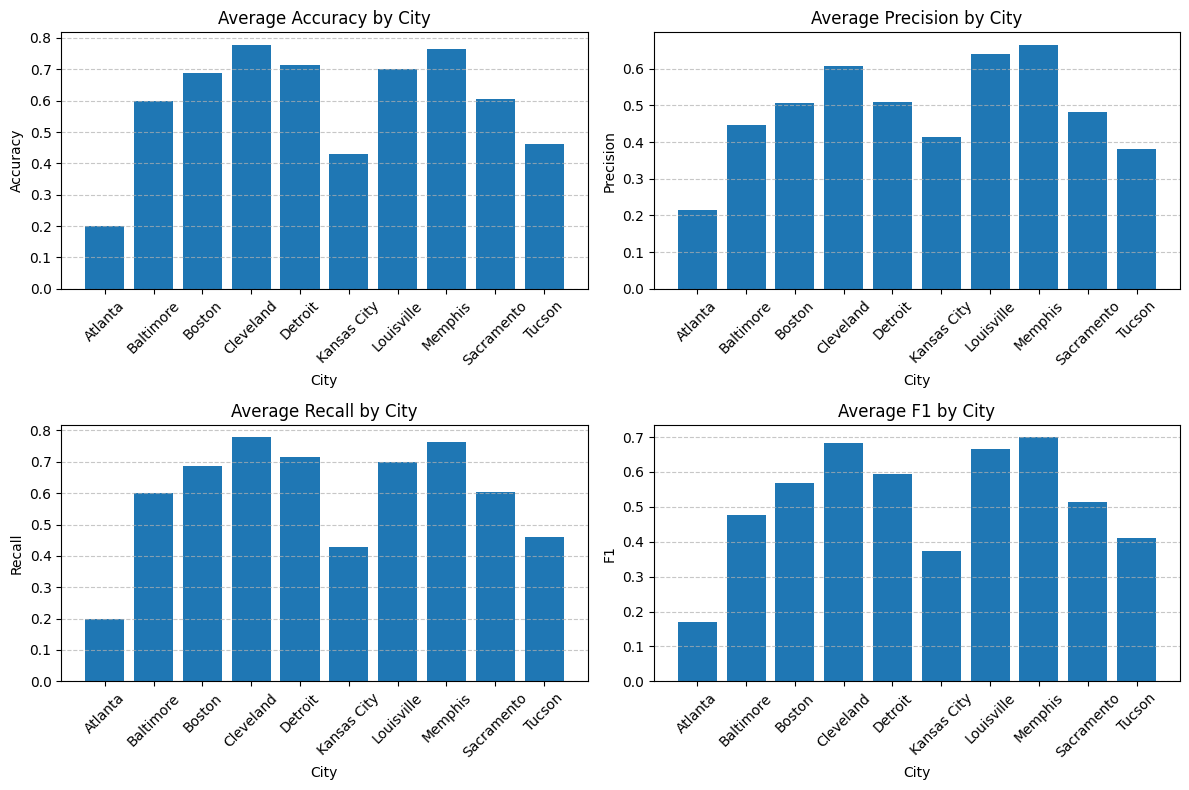

In [ ]:
# prompt: create one graph to represent all the cities average metrics

import matplotlib.pyplot as plt

# Assuming metrics_df is already created as in the previous code

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    ax.bar(metrics_df['City'], metrics_df[metric])
    ax.set_xlabel("City")
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f"Average {metric.capitalize()} by City")
    ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid for better visualization

plt.tight_layout() # Adjust spacing between subplots
plt.show()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Load all the data files
file_paths = [
    "/content/c_atlanta.csv",
    "/content/c_baltimore.csv",
    "/content/c_boston.csv",
    "/content/c_cleveland.csv",
    "/content/c_detroit.csv",
    "/content/c_kansascity.csv",
    "/content/c_louisville.csv",
    "/content/c_memphis.csv",
    "/content/c_sacramento.csv",
    "/content/c_tucson.csv"
]

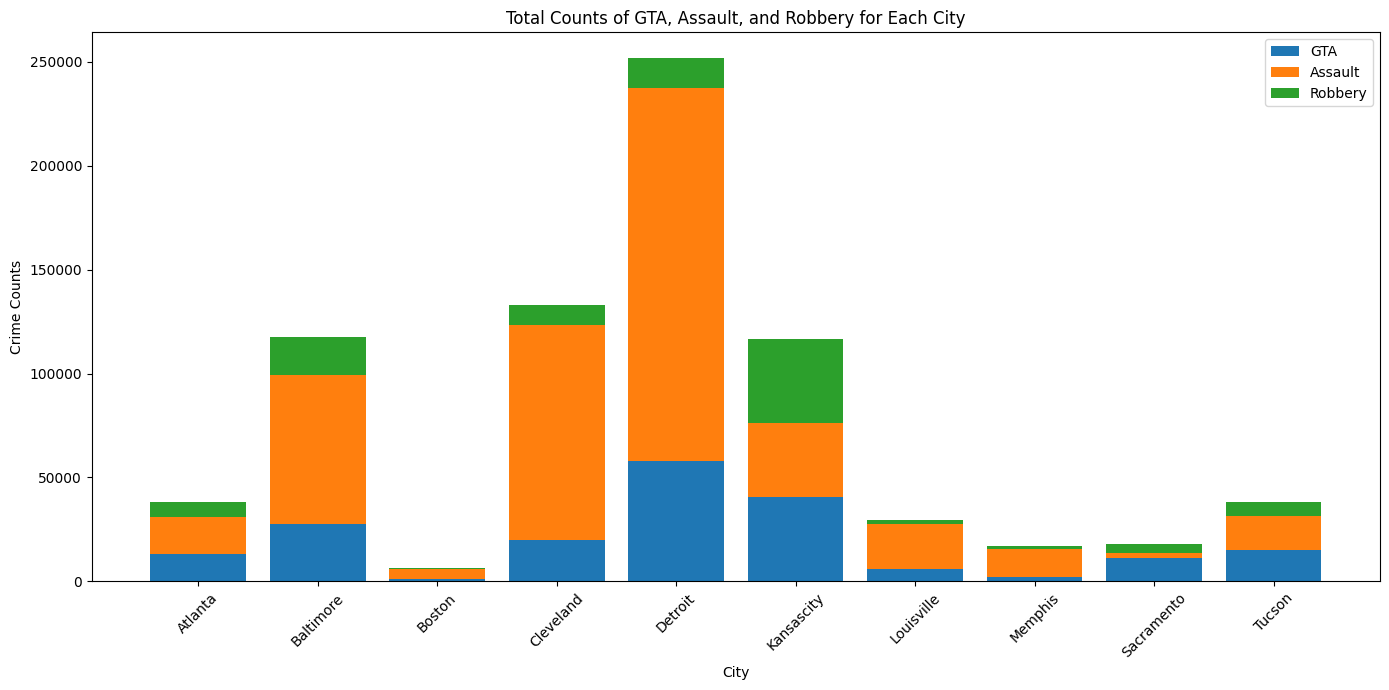

In [40]:
# Reprocess the code with careful handling of file paths and names
crime_counts = {"City": [], "GTA": [], "Assault": [], "Robbery": []}

for file_path in file_paths:
    # Extract city name from the file path
    city_name = file_path.split("/")[-1].split("_")[1].split(".")[0].capitalize()
    data = pd.read_csv(file_path)

    # Count occurrences of specified crimes
    gta_count = data[data['crime_type'] == 'gta'].shape[0]
    assault_count = data[data['crime_type'] == 'assault'].shape[0]
    robbery_count = data[data['crime_type'] == 'robbery'].shape[0]

    # Append counts to the dictionary
    crime_counts["City"].append(city_name)
    crime_counts["GTA"].append(gta_count)
    crime_counts["Assault"].append(assault_count)
    crime_counts["Robbery"].append(robbery_count)

# Convert to DataFrame for visualization
crime_counts_df = pd.DataFrame(crime_counts)

# Create a stacked bar chart
plt.figure(figsize=(14, 7))
cities = crime_counts_df["City"]
gta = crime_counts_df["GTA"]
assault = crime_counts_df["Assault"]
robbery = crime_counts_df["Robbery"]

plt.bar(cities, gta, label="GTA")
plt.bar(cities, assault, bottom=gta, label="Assault")
plt.bar(cities, robbery, bottom=gta + assault, label="Robbery")

plt.xlabel("City")
plt.ylabel("Crime Counts")
plt.title("Total Counts of GTA, Assault, and Robbery for Each City")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


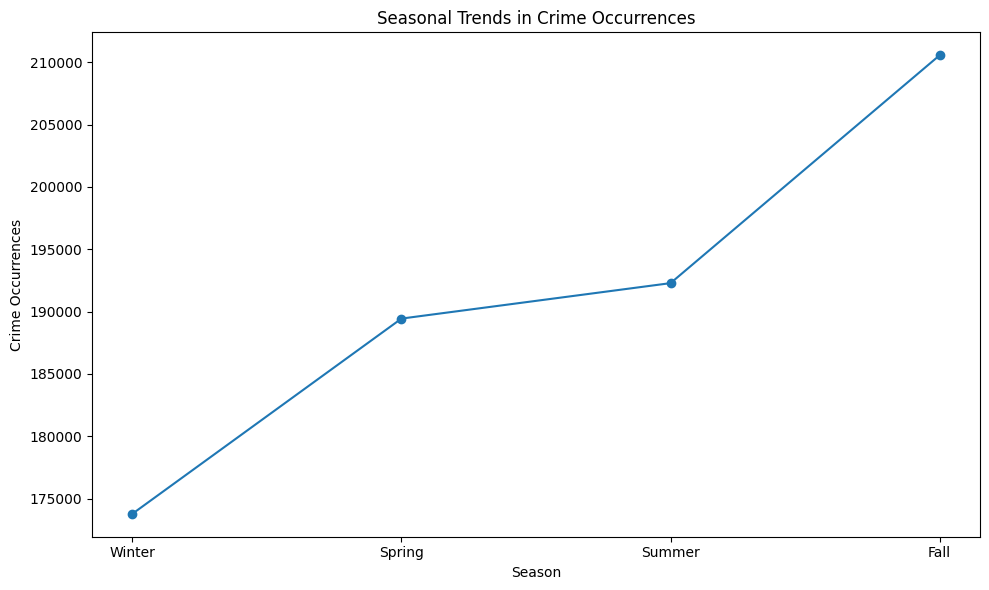

In [41]:
# Dictionary to store seasonal crime counts for all cities
seasonal_trends = {"Season": [], "Crime Count": []}

# Process each file to aggregate seasonal trends
for file_path in file_paths:
    data = pd.read_csv(file_path)

    # Count occurrences for each season
    season_counts = data['season'].value_counts()
    for season, count in season_counts.items():
        seasonal_trends["Season"].append(season.capitalize())
        seasonal_trends["Crime Count"].append(count)

# Convert to DataFrame for visualization
seasonal_trends_df = pd.DataFrame(seasonal_trends)
seasonal_trends_aggregated = seasonal_trends_df.groupby("Season")["Crime Count"].sum().reset_index()

# Sort seasons in order (Winter, Spring, Summer, Fall)
season_order = ["Winter", "Spring", "Summer", "Fall"]
seasonal_trends_aggregated["Season"] = pd.Categorical(
    seasonal_trends_aggregated["Season"], categories=season_order, ordered=True
)
seasonal_trends_aggregated.sort_values("Season", inplace=True)

# Create a line chart for seasonal trends
plt.figure(figsize=(10, 6))
plt.plot(seasonal_trends_aggregated["Season"], seasonal_trends_aggregated["Crime Count"], marker="o")
plt.xlabel("Season")
plt.ylabel("Crime Occurrences")
plt.title("Seasonal Trends in Crime Occurrences")
plt.tight_layout()
plt.show()

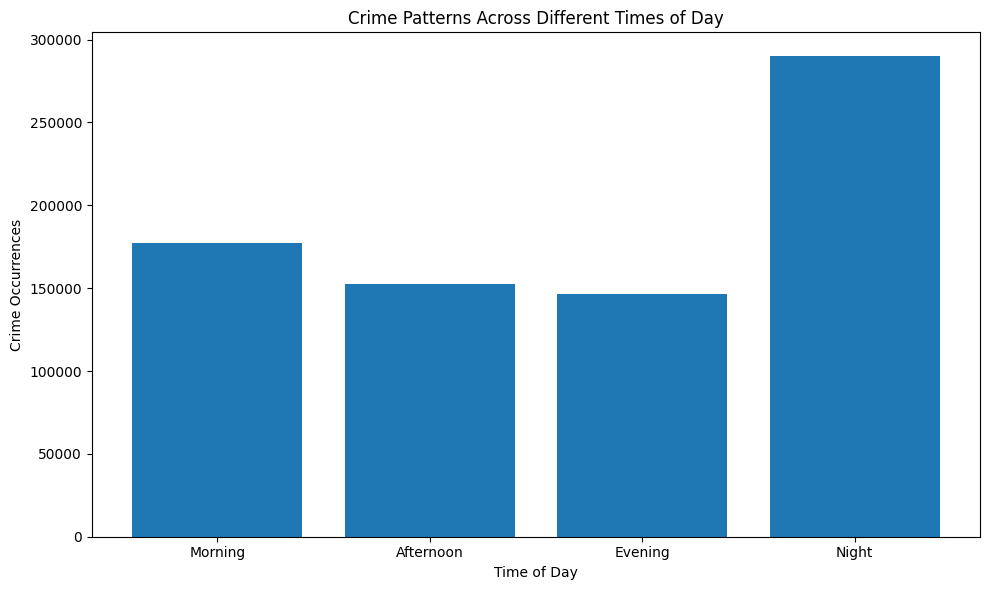

In [42]:
# Dictionary to store time-of-day crime counts for all cities
time_of_day_trends = {"Time of Day": [], "Crime Count": []}

# Process each file to aggregate time-of-day trends
for file_path in file_paths:
    data = pd.read_csv(file_path)

    # Count occurrences for each time of day
    time_counts = data['time_of_day'].value_counts()
    for time_period, count in time_counts.items():
        time_of_day_trends["Time of Day"].append(time_period.capitalize())
        time_of_day_trends["Crime Count"].append(count)

# Convert to DataFrame for visualization
time_of_day_trends_df = pd.DataFrame(time_of_day_trends)
time_of_day_trends_aggregated = time_of_day_trends_df.groupby("Time of Day")["Crime Count"].sum().reset_index()

# Sort time periods in logical order (Morning, Afternoon, Evening, Night)
time_order = ["Morning", "Afternoon", "Evening", "Night"]
time_of_day_trends_aggregated["Time of Day"] = pd.Categorical(
    time_of_day_trends_aggregated["Time of Day"], categories=time_order, ordered=True
)
time_of_day_trends_aggregated.sort_values("Time of Day", inplace=True)

# Create a bar chart for time-of-day trends
plt.figure(figsize=(10, 6))
plt.bar(time_of_day_trends_aggregated["Time of Day"], time_of_day_trends_aggregated["Crime Count"])
plt.xlabel("Time of Day")
plt.ylabel("Crime Occurrences")
plt.title("Crime Patterns Across Different Times of Day")
plt.tight_layout()
plt.show()

In [63]:
# prompt: Show the probability for each crime_type in QDA

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# ... (Your existing code for data loading and preprocessing) ...

# Assuming 'datasets' is a dictionary containing your crime dataframes
# and 'X' and 'y' are already defined as in the original code for one city
# Example for 'boston_data':
X = boston_data[['season', 'time_of_day', 'day_of_week']]
y = boston_data['crime_type']

X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Use a fixed random state for reproducibility

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Get the predicted probabilities for each class
predicted_probabilities = qda.predict_proba(X_test)

# Create a DataFrame to store the probabilities
probability_df = pd.DataFrame(predicted_probabilities, columns=boston_data['crime_type'].unique()) #Assumes unique crime types across all datasets


# You might need to adjust the column names or approach depending on how
# the crime types are encoded ('y' is category codes now)

# The 'probability_df' now contains the probabilities for each crime type
# for each sample in the test set.  Print or analyze the probability_df.
probability_df

,assault,gta,robbery
0,0.526018,0.162007,0.311975
1,0.555631,0.331698,0.112671
2,0.897971,0.081001,0.021027
3,0.703329,0.198773,0.097899
4,0.696584,0.124065,0.179351
...,...,...,...
1970,0.779802,0.082028,0.138170
1971,0.680848,0.195180,0.123972
1972,0.644681,0.215051,0.140268
1973,0.644574,0.118691,0.236735
